In [1]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(feature_train, label_train),(feature_test, label_test)= mnist.load_data()

print("train :",feature_train.shape,feature_train.shape)
print("test :",feature_test.shape,label_test.shape)

train : (60000, 28, 28) (60000, 28, 28)
test : (10000, 28, 28) (10000,)


In [3]:
## Normalisation => accelerer l'apprentissage

feature_train = tf.keras.utils.normalize(feature_train,axis=1)
feature_test = tf.keras.utils.normalize(feature_test,axis=1)

In [4]:
## valeur a determiner
valeur = 8
label_train = (label_train==valeur)*1
label_test  = (label_test==valeur)*1

In [6]:
print(label_test)

[0 0 0 ... 0 0 0]


In [5]:
## quelque fonction pour l'affichage
def aff(feature_set,label_set,idx):
    print(label_set[idx])
    plt.imshow(feature_set[idx])

aff_train = lambda idx : aff(feature_train,label_train,idx)
aff_test  = lambda idx : aff(feature_test,label_test,idx)

0


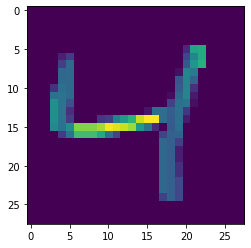

In [7]:
aff_train(2)
plt.show()

In [8]:
## Creation du model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1,activation= tf.keras.activations.sigmoid))

In [9]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(feature_train,label_train,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.3015 - accuracy: 0.9018
Epoch 2/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.2394 - accuracy: 0.9088
Epoch 3/10
60000/60000 [==============================] - 9s 142us/sample - loss: 0.2147 - accuracy: 0.9210
Epoch 4/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.2002 - accuracy: 0.9285
Epoch 5/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.1905 - accuracy: 0.9333
Epoch 6/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.1833 - accuracy: 0.9362
Epoch 7/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.1778 - accuracy: 0.9387
Epoch 8/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.1733 - accuracy: 0.9401
Epoch 9/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.1696 - accuracy: 0.9419
Epoc

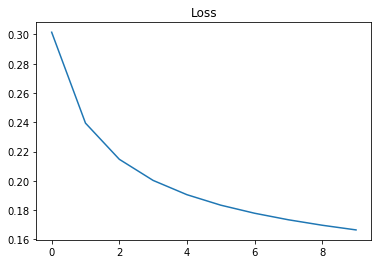

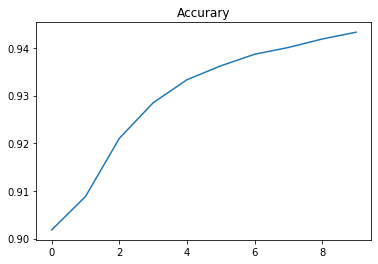

In [11]:
loss_curv = history.history["loss"]
acc_curve = history.history["accuracy"]

plt.plot(loss_curv)
plt.title("Loss")
plt.show()

plt.plot(acc_curve)
plt.title("Accurary")
plt.show()

In [12]:
## petit test
print(model.predict(feature_test[7:8]))

[[0.0126073]]


0


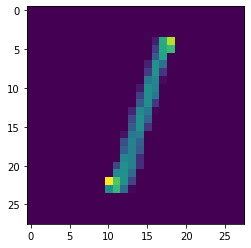

In [13]:
aff_test(2)

In [14]:
## performance
evaluate = model.evaluate(feature_train,label_train)
print(evaluate)

[0.1649022956589858, 0.94418335]


In [15]:
test_predic = model.predict(feature_test)
test_predic = 1*(test_predic>0.5)


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  785       
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.save("MNIST_sigmoid_find{}".format())

INFO:tensorflow:Assets written to: MNIST_sigmoid_find8/assets
